<a href="https://colab.research.google.com/github/venkat-chinni/logistic-regression/blob/main/logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Accuracy: 66.67%
Confusion Matrix:
[[2 0]
 [2 2]]


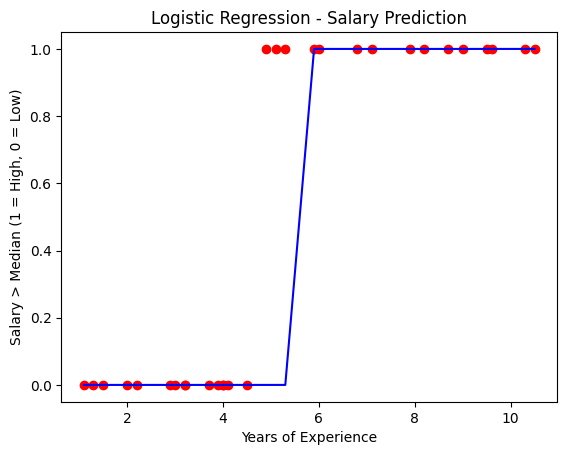

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/Salary_Data.csv')

# Check the first few rows of the data
print(df.head())

# Feature and Target
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary']

# Convert the salary into a binary target (e.g., 1 for high salary, 0 for low salary)
median_salary = y.median()
y_binary = np.where(y > median_salary, 1, 0)  # 1 = high salary, 0 = low salary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizing the results
plt.scatter(X, y_binary, color='red')
plt.plot(X, model.predict(scaler.transform(X)), color='blue')
plt.title('Logistic Regression - Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary > Median (1 = High, 0 = Low)')
plt.show()
